<h2>Step 0: Import Data</h2>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


<h2>Step 1: Remove Fare Amounts Less than $2.50</h2>

In [2]:
# creates new dataframe without fares less than $2.50
df1 = df[df['fare_amount'] > 2.50]

# resets the index
df1.reset_index(drop=True, inplace=True)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


<h2>Step 2: Converting Dates to pandas Date Time Objects</h2>

In [3]:
# converts to proper datetime format
df1.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(df1.loc[:, 'tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df1.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(df1.loc[:, 'tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

C:\Users\iawol\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<h2>Step 3: Add Column "day_of_week" and Format It</h2>

In [4]:
# gets the day of the week and then formats it so that the first 3 characters are used
df1.loc[:, 'day_of_week'] = df1.loc[:, 'tpep_pickup_datetime'].dt.weekday_name
df1.loc[:, 'day_of_week'] = df1.loc[:, 'day_of_week'].apply(lambda x: x[0:3])
df1.head()

C:\Users\iawol\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_of_week
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,Fri
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,Fri
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,Fri
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,Fri
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,Fri


<h2>Step 4: Add Column "duration"</h2>

In [5]:
# computes the duration and converts it into minutes
df1.loc[:, 'duration'] = (df1.loc[:, 'tpep_dropoff_datetime'] - df1.loc[:, 'tpep_pickup_datetime']).apply(lambda x:x/np.timedelta64(1, 's'))/60.0
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_of_week,duration
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,Fri,0.0
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,Fri,0.0
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,Fri,0.0
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,Fri,0.0
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,Fri,0.0


<h2>Step 5: Remove Rows with Duration Less than or Equal to 0.0 Minutes</h2>

In [6]:
# creates new dataframe without duration less than or equal to 0.0
df2 = df1[df1['duration'] > 0.0]

# resets the index
df2.reset_index(drop=True, inplace=True)
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_of_week,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,Fri,18.50
1,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,Fri,26.75
2,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,Fri,11.90
3,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,...,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,Fri,11.20
4,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,Fri,11.10


<h2>Step 6: Add Column "tip_percent"</h2>

In [7]:
# adds a column that has the tip_percent for each ride
df2.loc[:, 'tip_percent'] = df2.loc[:, 'tip_amount'] / df2.loc[:, 'fare_amount'] * 100

<h2>Step 7: Add Column "hour_of_day"</h2>

In [8]:
# adds a column for the hour of the day that the ride began
df2.loc[:, 'hour_of_day'] = df2.loc[:, 'tpep_pickup_datetime'].dt.hour

<h2>Step 8: Draw Histogram of Number of Rides by Day</h2>

In [9]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

output_notebook()

Loading BokehJS ...

In [10]:
# groups by the day of the week
df2_grouped_days = df2.groupby('day_of_week')

# pulls the days of the week and their associated number of rides and then makes a dataframe
x = np.array(df2_grouped_days.count()['VendorID'].index.tolist())
y = df2_grouped_days.count()['VendorID'].values
hist_df = pd.DataFrame({'x': x, 'y': y})

# creates columndatasource for bokeh
source = ColumnDataSource(hist_df)

# creates the tooltips for the bokeh figure
tooltips = [
    ("Day of the Week", "@x"),
    ("Number of Rides", "@y"),
]

# creates the plot itself --> here x_range has to be used to get the strings that make uo the x-axis label
plot = figure(x_range=hist_df['x'], plot_height = 600, 
           plot_width = 600, 
           title = 'Number of Rides by Day',
           x_axis_label = 'Day of the Week', 
           y_axis_label = 'Number of Rides',
          tooltips = tooltips)

# overlays the vertical bars over the plot
plot.vbar(x='x', top='y', bottom=0, width=0.5, source=source, fill_color='red', line_color='black',fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')


show(plot)

<h2>Step 9: Draw Histogram of Average Tip Percentage by Hour</h2>

In [11]:
# groups by the hour of the day
df2_grouped_hours = df2.groupby('hour_of_day')

# pulls the hours of the day and their associated average tip percentages and then makes a dataframe
x = np.array(df2_grouped_hours.mean()['tip_percent'].index.tolist())
y = df2_grouped_hours.mean()['tip_percent'].values
hist_df = pd.DataFrame({'x': x, 'y': y})

# creates columndatasource for bokeh
source = ColumnDataSource(hist_df)

# creates the tooltips for the bokeh figure
tooltips = [
    ("Hour of the Day", "@x"),
    ("Average Tip Percentage", "@y"),
]

# creates the plot itself
plot = figure(plot_height = 600, 
           plot_width = 600, 
           title = 'Average Tip Percentage by Hour',
           x_axis_label = 'Hour', 
           y_axis_label = 'Average Tip Percentage',
          tooltips = tooltips)

# overlays the vertical bars over the plot
plot.vbar(x='x', top='y', bottom=0, width=0.5, source=source, fill_color='red', line_color='black',fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')


show(plot)

<h2>Step 10: Draw Histogram of Average Trip Duration by Hour</h2>

In [12]:
# groups by the hour of the day
df2_grouped_hours = df2.groupby('hour_of_day')

# pulls the hours of the day and their associated average trip duration and then makes a dataframe
x = np.array(df2_grouped_hours.mean()['duration'].index.tolist())
y = df2_grouped_hours.mean()['duration'].values
hist_df = pd.DataFrame({'x': x, 'y': y})

# creates columndatasource for bokeh
source = ColumnDataSource(hist_df)

# creates the tooltips for the bokeh figure
tooltips = [
    ("Hour of the Day", "@x"),
    ("Average Trip Duration", "@y"),
]

# creates the plot itself
plot = figure(plot_height = 600, 
           plot_width = 600, 
           title = 'Average Trip Duration by Hour',
           x_axis_label = 'Hour', 
           y_axis_label = 'Average Trip Duration',
          tooltips = tooltips)

# overlays the vertical bars over the plot
plot.vbar(x='x', top='y', bottom=0, width=0.5, source=source, fill_color='red', line_color='black',fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')


show(plot)

<h2>Step 11: Draw Piechart of Driver's and City's Share</h2>

In [13]:
# creates columns for city_share and driver_share
df2.loc[:, 'city_share'] = df2.loc[:, 'mta_tax'] + df2.loc[:, 'tolls_amount'] + df2.loc[:, 'improvement_surcharge']
df2.loc[:, 'driver_share'] = df2.loc[:, 'total_amount'] - df2.loc[:, 'city_share']
df2.head()

C:\Users\iawol\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\iawol\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_of_week,duration,tip_percent,hour_of_day,city_share,driver_share
0,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,0.0,0.0,0.3,20.3,Fri,18.50,0.0,0,0.8,19.5
1,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,0.0,0.0,0.3,27.3,Fri,26.75,0.0,0,0.8,26.5
2,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,0.0,0.0,0.3,10.3,Fri,11.90,0.0,0,0.8,9.5
3,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,...,0.0,0.0,0.3,19.3,Fri,11.20,0.0,0,0.8,18.5
4,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,0.0,0.0,0.3,12.8,Fri,11.10,0.0,0,0.8,12.0


In [14]:
# computes the average driver and city share
average_driver = df2['driver_share'].mean()
average_city = df2['city_share'].mean()

In [15]:
import matplotlib.pyplot as plt

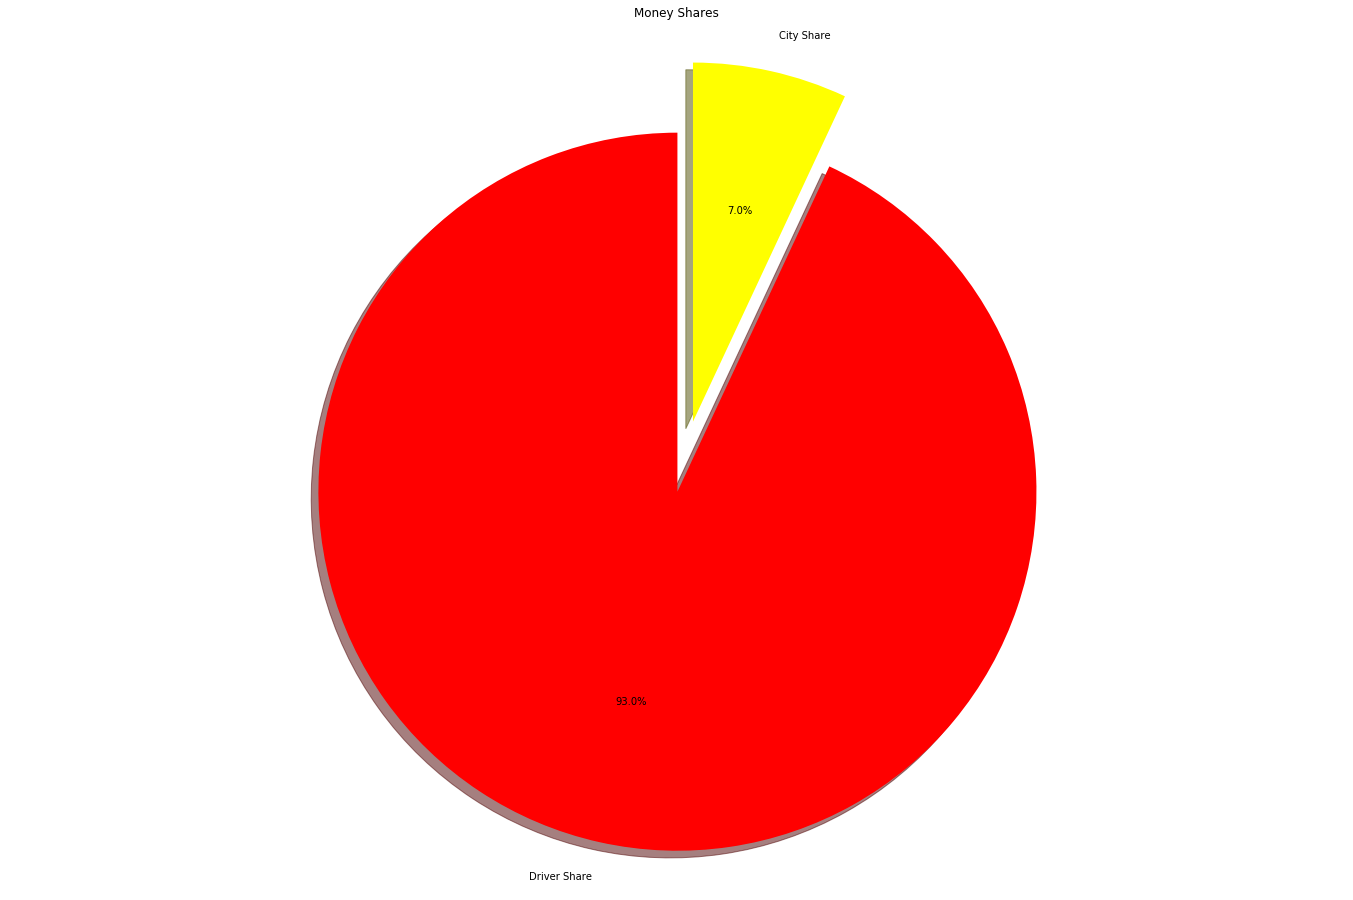

In [16]:
# labels for piechart and sizes of each slice
labels = ['Driver Share', 'City Share']
sizes = [average_driver, average_city]

# name of slice to be exploded
explode_slice = 'City Share'

# makes a list of 0s
explode = [0.0] * len(labels)

# finds the location of the slice to be exploded in the labels list
location = labels.index(explode_slice)

# makes the slice to be exploded explode by 0.2
explode[location] = 0.2

# creates the plotting area
fig1, ax1 = plt.subplots(figsize=(24,16))

# creates the piechart
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red', 'yellow'], explode=explode)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Money Shares")
plt.show()

<h2>Step 12: Draw Histogram of Number of Trips by Hour With Day of the Week Widget</h2>

In [17]:
from ipywidgets import interact
import numpy as np
from bokeh.io import push_notebook,output_notebook,show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [18]:
#row will allow placing the graph and the widget side by side
from bokeh.layouts import row

#import the dropdown widget along with CustomJS, bokeh's JavaScript library
from bokeh.models import CustomJS, ColumnDataSource, Dropdown

# creating interactive_df from df2_grouped_hours_day
df2_grouped_hours_day = df2.groupby(['day_of_week', 'hour_of_day']).count().unstack()

# extracts column names
columns = [x[1] for x in df2_grouped_hours_day.columns][0:24]

# extracts the index
index = df2_grouped_hours_day.index.tolist()

# extracts the values
values = df2_grouped_hours_day.iloc[:, 0:24].values

# creates the dataframe
interactive_df = pd.DataFrame(values, columns=columns, index=index).transpose()

# gets list of the days for the widget
list_of_days = interactive_df.columns.tolist()

#add a new column to the object called 'display'
#when the user selects a new agency, we'll copy that agency's data into this column
#the histogram will display whatever is in this column

interactive_df['display'] = interactive_df.loc[:, 'Fri']

# creates columndatasource for bokeh
source = ColumnDataSource(interactive_df)

# creates tooltips for the figure
tooltips = [
    ("Hour", "@index"),
    ("Number of Rides", "@display"),
]
    
#creates the plot itself
plot = figure(plot_height = 600, 
           plot_width = 600, 
           title = 'Number of Rides by Hour by Day',
           x_axis_label = 'Hour', 
           y_axis_label = 'Number of Rides',
           tooltips = tooltips)

# overlays the vertical bars over the plot
plot.vbar(x='index', top='display', bottom=0, width=0.5, source=source, 
          fill_color='red', line_color='black',fill_alpha = 0.75,
          hover_fill_alpha = 1.0, hover_fill_color = 'navy')

#Create a javascript callback as a call to CustomJS
#arguments are the data (the source)
#and a string containing the JavaScript code

#cb_obj.value is the selected value (returned by the widget)
#create a variable that holds the data in source
#replace the display column in the data by the column for the selected agency
#register the change (emit it!)
jscallback = CustomJS(args={'source':source},code="""
        // widget. cb_obj.value is the selected value
        // We can print it on the JavaScript console
        // Chrome windows/linux: Ctrl - Shift - J
        // Chrom mac: Cmd - Option - J
        // Safari: Option - Cmd - C
        
        console.log(' changed selected option', cb_obj.value);

        //data is the variable containing all the data
        var data = source.data;

        // allocate the selected column to the field for the y values
        // copies data from the agency selected to the display column
        data['display'] = data[cb_obj.value];

        // register the change 
        source.change.emit();
""")

#Create the dropdown widget
#the widget contains a menu in the form of a list of tuples
#(long name, value to be returned)
#the widget has a callback argument. Use the jscallback as the value of this argument
menu = [(x,x) for x in list_of_days]
day_selection = Dropdown(label="select day", button_type="primary", 
                            menu=menu,callback=jscallback)


#construct a row object containing the plot and the widget
layout = row(plot, day_selection)

#show it!
show(layout)

<h2>Step 13: Divide Day into 8 Segments</h2>

In [19]:
# groups by fay of the week and hour of the day
df2_grouped_days_hours = df2.groupby(['day_of_week', 'hour_of_day']).count().unstack()

# gets the column names from the list of tuples
columns = [x[1] for x in df2_grouped_days_hours.columns][0:24]

# gets the index
index = df2_grouped_days_hours.index.tolist()

# gets the values
values = df2_grouped_days_hours.iloc[:, 0:24].values

# constructs the dataframe
days_hours_df = pd.DataFrame(values, columns=columns, index=index).transpose()

# groups into each 3 hour block
segments = days_hours_df.groupby(days_hours_df.index // 3).sum()

# sets the new index
segments.index = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']
segments

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0-2,186940,58260,239823,237250,74957,57471,64422
3-5,87548,31108,90842,98056,33640,29314,31338
6-8,216105,154713,79974,65885,204492,202235,202800
9-11,245713,184711,194554,191268,218804,216645,216832
12-14,276087,196653,246191,261830,220990,206635,213235
15-17,276456,218544,245836,266367,219249,214547,216682
18-20,351077,255618,273946,246793,298447,273013,291565
21-23,322081,175433,264198,179093,265996,216030,240394


<h2>Step 14: Make Piechart Grid of Percentage of Trips made in Time Interval by Day</h2>

In [20]:
# creates a row at the bottom containing the total trips made each day
segments.loc['total_trips'] = segments.sum()

In [21]:
from matplotlib.pyplot import GridSpec

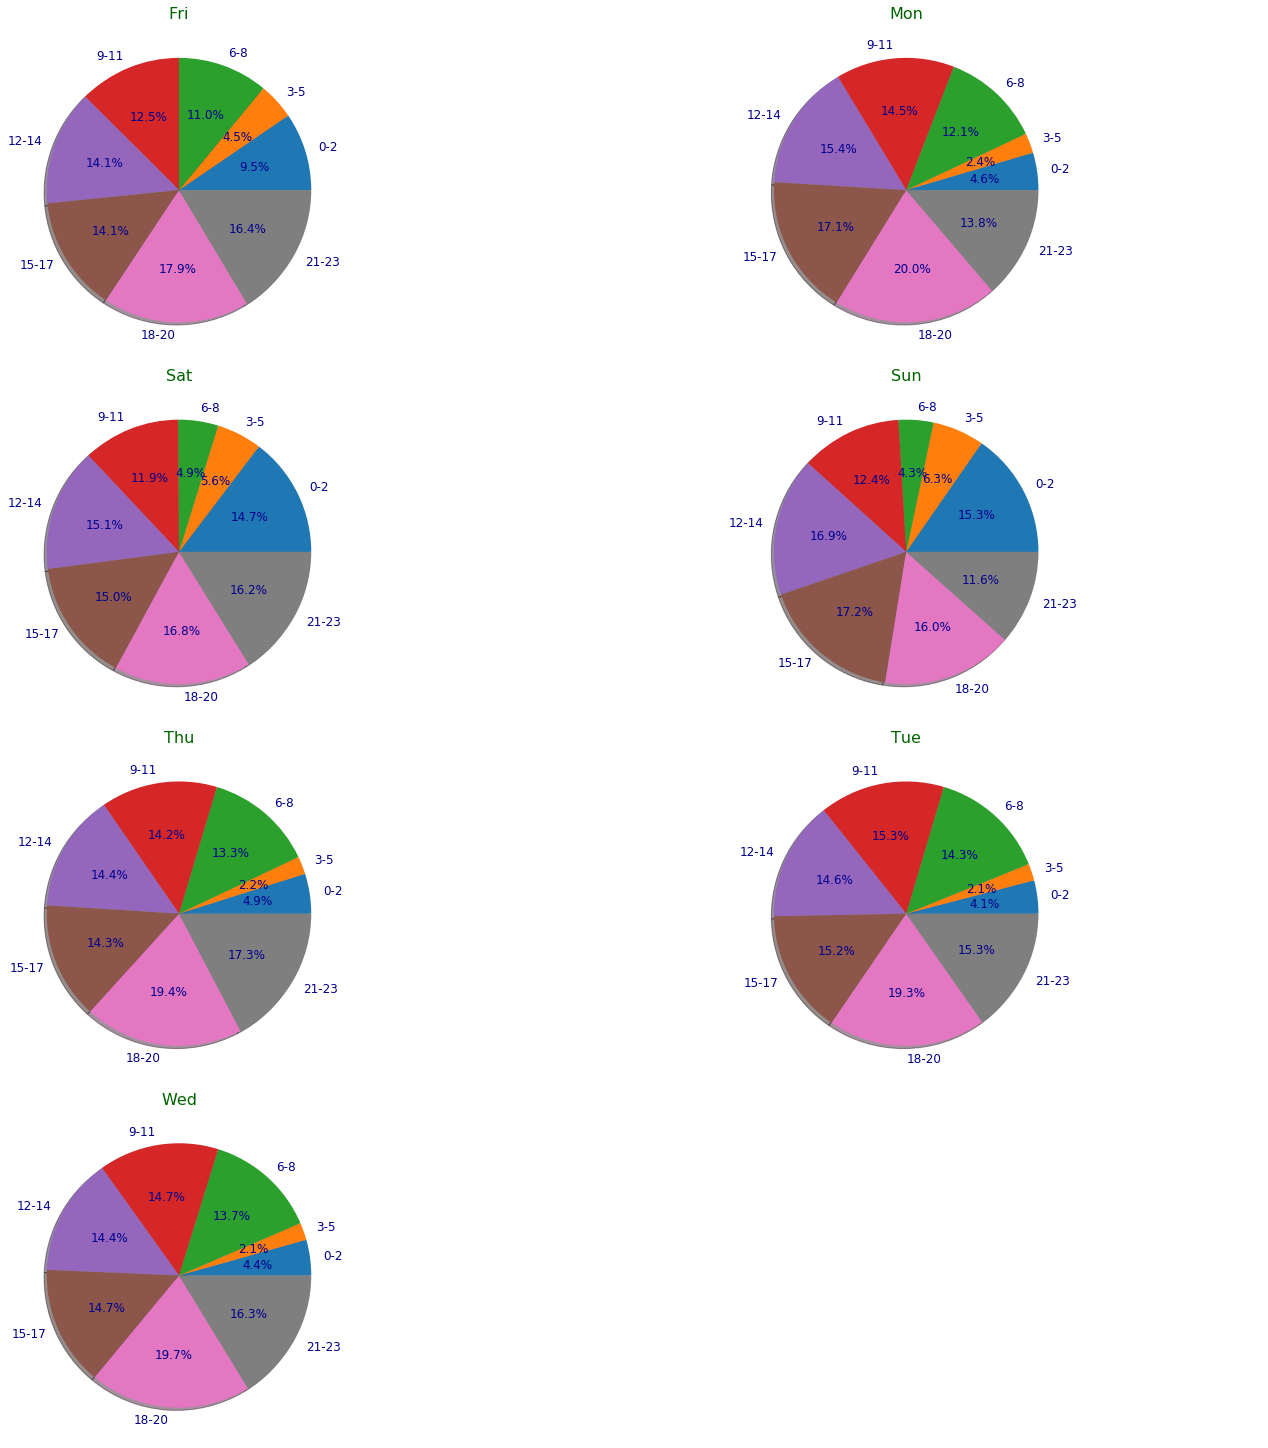

In [22]:
# The number of rows and columns in the grid also the index values, each value will correspond to one piechart
values = segments.columns.tolist()
rows = len(values) // 2 + 1
columns = 2

#Figure specs. Create the figure, specify the grid
fig = plt.figure(figsize=(20,20),constrained_layout = True)
grid = GridSpec(rows,columns,fig)

#labels are the same for all the charts so we can pull it out of the loop
labels = segments.index.tolist()[:-1]

#Iterate through values
#for each value, draw a piechart
#position it in the grid in the appropriate cell
for i in range(len(values)):
    plt.subplot(grid[i//2,i%2])
    sizes = segments.iloc[:-1, i] / segments.iloc[-1, i] 
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'color':'darkblue','fontsize':12})
    font = {'size':16,'color':'darkgreen'}
    plt.title(values[i],fontdict=font)
plt.show()